# Import Packages 

In [1]:
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import shutil
import pandas as pd

# Downloading data 

In [2]:
# Downloading data 
article_id = 14096681 
url = f"https://api.figshare.com/v2/articles/{article_id}"
headers = {"Content-Type": "application/json"}
#output
output_directory = "data/"
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)  
files = data["files"]             
files

[{'id': 26579150,
  'name': 'daily_rainfall_2014.png',
  'size': 58863,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579150',
  'supplied_md5': 'fd32a2ffde300a31f8d63b1825d47e5e',
  'computed_md5': 'fd32a2ffde300a31f8d63b1825d47e5e'},
 {'id': 26579171,
  'name': 'environment.yml',
  'size': 192,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579171',
  'supplied_md5': '060b2020017eed93a1ee7dd8c65b2f34',
  'computed_md5': '060b2020017eed93a1ee7dd8c65b2f34'},
 {'id': 26586554,
  'name': 'README.md',
  'size': 5422,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26586554',
  'supplied_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c',
  'computed_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c'},
 {'id': 26766812,
  'name': 'data.zip',
  'size': 814041183,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26766812',
  'supplied_md5': 'b517383f76e77bd03755a63a8f

In [3]:
%%time

if os.path.exists(f"{output_directory}'data.zip'"):
    print("file exists")

else:
    files_to_dl = ["data.zip"]  
    for file in files:
        if file["name"] in files_to_dl:
            os.makedirs(output_directory, exist_ok=True)
            urlretrieve(file["download_url"], output_directory + file["name"])

CPU times: user 2.3 s, sys: 2.33 s, total: 4.62 s
Wall time: 1min 31s


### Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza                | MacOS BigSur     | 8        | 3.1 GHz Intel Core i5     | Yes    | 2 mins 50s   |
| Taiwo Owoseni        | MacOS Catalina   | 8        |1.1GHz 4-core Intel Core i5  | Yes  | 20s    |
| Allyson Stoll        | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 5.69s      |
| Ramiro               | Windows Pro 10 x64   | 8     | Intel Core i5-9300H 2.40 GHz                | No    | 7 mins 31s |

In [4]:
%%time
with zipfile.ZipFile(os.path.join(output_directory, "data.zip"), 'r') as f:
    f.extractall(output_directory)

CPU times: user 15.5 s, sys: 3.14 s, total: 18.7 s
Wall time: 20.2 s


### Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza                | MacOS BigSur     | 8        | 3.1 GHz Intel Core i5     | Yes    | 26.7s   |
| Taiwo Owoseni        | MacOS Catalina   | 8        |1.1GHz 4-core Intel Core i5  | Yes  | 31.2s    |
| Allyson Stoll        | MacOS BigSur     | 16       | 2.8GHz Intel Core i7      | Yes   | 16.4s      |
| Ramiro Mejia         | Windows Pro 10 x64   | 8     | Intel Core i5-9300H 2.40 GHz               | No    | 2 mins 10s |

In [5]:
# moving/excluding observed rain_fall to another folder 

observed_rain_fall = 'observed_daily_rainfall_SYD.csv'

os.makedirs(os.path.join(output_directory, 'observed_daily_rainfall_SYD'), exist_ok=True)

if os.path.exists(os.path.join(output_directory, observed_rain_fall)):
    shutil.move(os.path.join(output_directory, observed_rain_fall), os.path.join(output_directory, 'observed_daily_rainfall_SYD/', observed_rain_fall))


In [6]:
%ls data

ACCESS-CM2_daily_rainfall_NSW.csv
ACCESS-ESM1-5_daily_rainfall_NSW.csv
AWI-ESM-1-1-LR_daily_rainfall_NSW.csv
BCC-CSM2-MR_daily_rainfall_NSW.csv
BCC-ESM1_daily_rainfall_NSW.csv
CMCC-CM2-HR4_daily_rainfall_NSW.csv
CMCC-CM2-SR5_daily_rainfall_NSW.csv
CMCC-ESM2_daily_rainfall_NSW.csv
CanESM5_daily_rainfall_NSW.csv
EC-Earth3-Veg-LR_daily_rainfall_NSW.csv
FGOALS-f3-L_daily_rainfall_NSW.csv
FGOALS-g3_daily_rainfall_NSW.csv
GFDL-CM4_daily_rainfall_NSW.csv
GFDL-ESM4_daily_rainfall_NSW.csv
INM-CM4-8_daily_rainfall_NSW.csv
INM-CM5-0_daily_rainfall_NSW.csv
KIOST-ESM_daily_rainfall_NSW.csv
MIROC6_daily_rainfall_NSW.csv
MPI-ESM-1-2-HAM_daily_rainfall_NSW.csv
MPI-ESM1-2-HR_daily_rainfall_NSW.csv
MPI-ESM1-2-LR_daily_rainfall_NSW.csv
MRI-ESM2-0_daily_rainfall_NSW.csv
NESM3_daily_rainfall_NSW.csv
NorESM2-LM_daily_rainfall_NSW.csv
NorESM2-MM_daily_rainfall_NSW.csv
SAM0-UNICON_daily_rainfall_NSW.csv
TaiESM1_daily_rainfall_NSW.csv
__MACOSX/
data.zip
observed_daily_rainfall_SYD/


# Combine data CSVs into a single CSV using pandas.

In [7]:
%%time

files = glob.glob(f"{output_directory}/*.csv")
                  
df = pd.concat((pd.read_csv(file, index_col=0, parse_dates=True)
                .assign(file=re.findall(r'(?<=\/)(.*)(?=_daily)', file)[0])
                for file in files)
              )

df.to_csv(os.path.join(output_directory, "combined_data.csv"))

CPU times: user 7min 26s, sys: 22.5 s, total: 7min 49s
Wall time: 8min 2s


In [8]:
df.head()

,lat_min,lat_max,lon_min,lon_max,rain (mm/day),file
time,,,,,,
1889-01-01 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.244226e-13,MPI-ESM-1-2-HAM
1889-01-02 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.217326e-13,MPI-ESM-1-2-HAM
1889-01-03 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.498125e-13,MPI-ESM-1-2-HAM
1889-01-04 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.251282e-13,MPI-ESM-1-2-HAM
1889-01-05 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.270161e-13,MPI-ESM-1-2-HAM


### Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza                | MacOS BigSur     | 8        | 3.1 GHz Intel Core i5     | Yes    | 7 mins 58s   |
| Taiwo Owoseni        | MacOS Catalina   | 8        |1.1GHz 4-core Intel Core i5  | Yes  | 8min 53s    |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 7 mins 9s  |
| Ramiro Mejia          |  Windows Pro 10 x64   | 8     | Intel Core i5-9300H 2.40 GHz                | No    | 9 mins 19s |

# Load the CSV into memory and complete simple EDA

In [9]:
%%time
data = pd.read_csv(os.path.join(output_directory, "combined_data.csv") ,index_col=0, parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62467843 entries, 1889-01-01 12:00:00 to 2014-12-31 12:00:00
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   lat_min        float64
 1   lat_max        float64
 2   lon_min        float64
 3   lon_max        float64
 4   rain (mm/day)  float64
 5   file           object 
dtypes: float64(5), object(1)
memory usage: 3.3+ GB
CPU times: user 1min 2s, sys: 16.6 s, total: 1min 19s
Wall time: 1min 24s


### Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza                | MacOS BigSur     | 8        | 3.1 GHz Intel Core i5     | Yes    |  1 min 47s |
| Taiwo Owoseni        | MacOS Catalina   | 8        |1.1GHz 4-core Intel Core i5  | Yes  | 2 mins 6s    |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 1 min 11s  |
| Ramiro Mejia          |  Windows Pro 10 x64   | 8     | Intel Core i5-9300H 2.40 GHz              | No    | 2 mins 25s |

## 1- Changing dtypes

In [10]:
%%time

types = {'lat_min': 'float16', 
          'lat_max': 'float16', 
          'lon_min': 'float16', 
          'lon_max': 'float16',
          'rain (mm/day)':'float16',
          'file':'str'}

df = pd.read_csv(os.path.join(output_directory, "combined_data.csv"),index_col=0, parse_dates=True, dtype=types)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62467843 entries, 1889-01-01 12:00:00 to 2014-12-31 12:00:00
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   lat_min        float16
 1   lat_max        float16
 2   lon_min        float16
 3   lon_max        float16
 4   rain (mm/day)  float16
 5   file           object 
dtypes: float16(5), object(1)
memory usage: 1.5+ GB
CPU times: user 1min, sys: 8.27 s, total: 1min 9s
Wall time: 1min 11s


### Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza                | MacOS BigSur     | 8        | 3.1 GHz Intel Core i5     | Yes    |  1 min 22s  |
| Taiwo Owoseni        | MacOS Catalina   | 8        |1.1GHz 4-core Intel Core i5  | Yes  | 1 min 51s    |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 1 min 3s   |
| Ramiro Mejia          |  Windows Pro 10 x64   | 8     | Intel Core i5-9300H 2.40 GHz               | No    | 2 mins 6s  |

## 2- Selected columns

In [11]:
%%time

cols = ["rain (mm/day)","file"]
types = {'rain (mm/day)':'float16',
        'file':'str'}
df = pd.read_csv(os.path.join(output_directory, "combined_data.csv"),
                 index_col=0, parse_dates=True, usecols=cols, dtype=types)
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 62467843 entries, 0.0 to 68.125
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   file    object
dtypes: object(1)
memory usage: 953.2+ MB
CPU times: user 1min 25s, sys: 11 s, total: 1min 36s
Wall time: 1min 41s


### Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza                | MacOS BigSur     | 8        | 3.1 GHz Intel Core i5     | Yes    | 1 mins 56s   |
| Taiwo Owoseni        | MacOS Catalina   | 8        |1.1GHz 4-core Intel Core i5  | Yes  | 3 min 7s    |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 1 min 22s   |
| Ramiro Mejia          |  Windows Pro 10 x64   | 8     | Intel Core i5-9300H 2.40 GHz  | No    | 2 mins 7s |

In [12]:
%%time

df.reset_index().groupby('file').describe()

CPU times: user 6.9 s, sys: 2.45 s, total: 9.35 s
Wall time: 9.98 s


rain (mm/day)                                         \
                         count      mean       std  min           25%   
file                                                                    
ACCESS-CM2           1932840.0  1.787023  5.914173  0.0  5.390167e-03   
ACCESS-ESM1-5        1610700.0  2.217500  6.422388  0.0  1.029015e-03   
AWI-ESM-1-1-LR        966420.0  2.026072  5.321893  0.0  0.000000e+00   
BCC-CSM2-MR          3035340.0  1.951832  6.200959  0.0  0.000000e+00   
BCC-ESM1              551880.0  1.811032  5.358356  0.0  0.000000e+00   
CMCC-CM2-HR4         3541230.0  2.279351  5.629971  0.0  1.562500e-02   
CMCC-CM2-SR5         3541230.0  2.383389  5.895953  0.0  4.634857e-03   
CMCC-ESM2            3541230.0  2.266125  5.538432  0.0  3.831863e-03   
CanESM5               551880.0  1.894324  5.835748  0.0  5.088806e-03   
EC-Earth3-Veg-LR     3037320.0  1.516259  4.714336  0.0  0.000000e+00   
FGOALS-f3-L          3219300.0  1.627373  5.747383  0.0  1.072884e-06   
FGOALS-g3            1287720.0  2.156419  6.015487  0.0  7.446289e-03   
GFDL-CM4             3219300.0  1.414485  5.024921  0.0  1.096725e-04   
GFDL-ESM4                  0.0       NaN       NaN  NaN           NaN   
INM-CM4-8            1609650.0  2.811463  6.266296  0.0  4.249573e-03   
INM-CM5-0            1609650.0  2.669014  6.534091  0.0  2.551079e-05   
KIOST-ESM            1287720.0  1.102351  3.852046  0.0  6.467104e-05   
MIROC6               2070900.0  2.301662  6.393745  0.0  3.511429e-03   
MPI-ESM-1-2-HAM       966420.0  1.610720  4.885517  0.0  0.000000e+00   
MPI-ESM1-2-HR        5154240.0  0.995569  4.083814  0.0  0.000000e+00   
MPI-ESM1-2-LR         966420.0  1.074307  3.911690  0.0  0.000000e+00   
MRI-ESM2-0           3037320.0  1.368030  4.517986  0.0  5.960464e-08   
NESM3                 966420.0  1.621936  4.971972  0.0  0.000000e+00   
NorESM2-LM            919800.0  2.230799  5.681568  0.0  3.757477e-04   
NorESM2-MM           3541230.0  2.232965  6.151682  0.0  4.057884e-04   
SAM0-UNICON          3541153.0  2.169676  6.383242  0.0  1.054406e-04   
TaiESM1              3541230.0  2.224575  5.886574  0.0  1.763344e-03   

                                                
                       50%       75%       max  
file                                            
ACCESS-CM2        0.100281  0.727051  433.0000  
ACCESS-ESM1-5     0.134521  1.314453  202.0000  
AWI-ESM-1-1-LR    0.044250  0.985352   89.4375  
BCC-CSM2-MR       0.043213  0.984375  286.2500  
BCC-ESM1          0.010910  0.837402  164.0000  
CMCC-CM2-HR4      0.268799  1.789062  224.1250  
CMCC-CM2-SR5      0.217163  1.839844  202.8750  
CMCC-ESM2         0.202881  1.773438  230.2500  
CanESM5           0.086365  1.021484  173.8750  
EC-Earth3-Veg-LR  0.009804  0.666016  181.3750  
FGOALS-f3-L       0.022171  0.633789  221.8750  
FGOALS-g3         0.197266  1.360352  231.0000  
GFDL-CM4          0.018845  0.454590  213.0000  
GFDL-ESM4              NaN       NaN       NaN  
INM-CM4-8         0.572266  2.857422  213.3750  
INM-CM5-0         0.422607  2.439453  183.7500  
KIOST-ESM         0.023483  0.519531  171.1250  
MIROC6            0.133545  1.399414  226.5000  
MPI-ESM-1-2-HAM   0.000000  0.321533   94.2500  
MPI-ESM1-2-HR     0.000000  0.123657  166.0000  
MPI-ESM1-2-LR     0.000000  0.178345   83.9375  
MRI-ESM2-0        0.004738  0.458008  156.0000  
NESM3             0.006626  0.505371  113.9375  
NorESM2-LM        0.092834  1.479492  131.3750  
NorESM2-MM        0.081848  1.348633  263.7500  
SAM0-UNICON       0.064453  1.222656  208.2500  
TaiESM1           0.116699  1.458008  200.5000

### Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza                | MacOS BigSur     | 8        | 3.1 GHz Intel Core i5     | Yes    |  10.5s |
| Taiwo Owoseni        | MacOS Catalina   | 8        |1.1GHz 4-core Intel Core i5  | Yes  | 15s    |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 8.45s      |
| Ramiro Mejia          |  Windows Pro 10 x64   | 8     | Intel Core i5-9300H 2.40 GHz                | No    |   18s  |

## 3- Chunks

In [13]:
%%time

counts = pd.Series(dtype=int)
for chunk in pd.read_csv(os.path.join(output_directory, "combined_data.csv"), chunksize=100_000):
    counts = counts.add(chunk["file"].value_counts(), fill_value=0)
print(counts.astype(int))

ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
AWI-ESM-1-1-LR       966420
BCC-CSM2-MR         3035340
BCC-ESM1             551880
CMCC-CM2-HR4        3541230
CMCC-CM2-SR5        3541230
CMCC-ESM2           3541230
CanESM5              551880
EC-Earth3-Veg-LR    3037320
FGOALS-f3-L         3219300
FGOALS-g3           1287720
GFDL-CM4            3219300
GFDL-ESM4           3219300
INM-CM4-8           1609650
INM-CM5-0           1609650
KIOST-ESM           1287720
MIROC6              2070900
MPI-ESM-1-2-HAM      966420
MPI-ESM1-2-HR       5154240
MPI-ESM1-2-LR        966420
MRI-ESM2-0          3037320
NESM3                966420
NorESM2-LM           919800
NorESM2-MM          3541230
SAM0-UNICON         3541153
TaiESM1             3541230
dtype: int64
CPU times: user 57.7 s, sys: 9.83 s, total: 1min 7s
Wall time: 1min 9s


### Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza                | MacOS BigSur     | 8        | 3.1 GHz Intel Core i5     | Yes    | 1 min 18s  |
| Taiwo Owoseni        | MacOS Catalina   | 8        |1.1GHz 4-core Intel Core i5  | Yes  | 1 min 38s    |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 1 min 1s   |
| Ramiro Mejia          | Windows 10 Pro x64   | 8     | Intel Core i5-9300H 2.40 GHz             | No    | 4 mins 40s |

# 4- Transfer data to R and EDA

## 4.1- Transfer files to R

In [14]:
# setting up the envinroment to be able to run py2R

#os.environ['R_HOME'] = 'C:/Program Files/R/R-4.1.1' #Ramiro directory
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Versions/4.1/Resources/' #Allyson directory

In [15]:
%load_ext rpy2.ipython

In [16]:
df = pd.read_csv(os.path.join(output_directory, "combined_data.csv"), nrows=1_000_000)

In [17]:
%%time
%%R -i df
start_time <- Sys.time()
suppressMessages(library(dplyr))
result <- df %>% count(file)
print(result)
end_time <- Sys.time()
print(end_time - start_time)

             file      n
1  AWI-ESM-1-1-LR  33580
2 MPI-ESM-1-2-HAM 966420
Time difference of 0.7715468 secs
CPU times: user 27.4 s, sys: 862 ms, total: 28.2 s
Wall time: 29.1 s


### Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza                | MacOS BigSur     | 8        | 3.1 GHz Intel Core i5     | Yes    |  39.4s |
| Taiwo Owoseni        | MacOS Catalina   | 8        |1.1GHz 4-core Intel Core i5  | Yes  | 48s    |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 1 min 1s   |
| Ramiro Mejia          | Windows 10 Pro x64   | 8     | Intel Core i5-9300H 2.40 GHz             | No    | 1 mins 40s |

## 4.2- Transfer files to R via Parquet

Parquet was selected to transfer the data to R because:
- It is language agnostic and provides excellent file size reduction. 
- It is also partitionable, so we can select only the information we want to do EDA.
- Parquet file is easily working with libraries like `arrow` to read into R, which comes handy. 
- It can handle more complicated file paths with ease and is built for long-term storage.

In [18]:
%%time

data.to_parquet(os.path.join(output_directory, "combined_data.parquet"))
data.to_parquet(os.path.join(output_directory, "combined_data_partition.parquet"), partition_cols=['file'])

CPU times: user 38.4 s, sys: 21.4 s, total: 59.8 s
Wall time: 54.8 s


### Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza                | MacOS BigSur     | 8        | 3.1 GHz Intel Core i5     | Yes    | 1 min 18s   |
| Taiwo Owoseni        | MacOS Catalina   | 8        |1.1GHz 4-core Intel Core i5  | Yes  | 1 min 55s    |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 1min 1s    |
| Ramiro Mejia          |Windows 10 Pro x64    | 8     | Intel Core i5-9300H 2.40 GHz                | No    |   8min 5s   |

In [19]:
%%sh
# I am just seeing the size of the csv data
du -sh data/combined_data.csv

# I am just seeing the size of the parquet data
du -sh data/combined_data.parquet

# I am just seeing the size of the partitioned parquet data
du -sh data/combined_data_partition.parquet

5.6G	data/combined_data.csv
544M	data/combined_data.parquet
549M	data/combined_data_partition.parquet


# 5- Simple EDA in R

In [20]:
# %load_ext rpy2.ipython

## 5.1 - Density Plot of Rainfall in four randomly selected file 

R[write to console]: 
Attaching package: ‘arrow’


R[write to console]: The following object is masked from ‘package:utils’:

    timestamp


R[write to console]: Need help getting started? Try the R Graphics Cookbook:
https://r-graphics.org

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



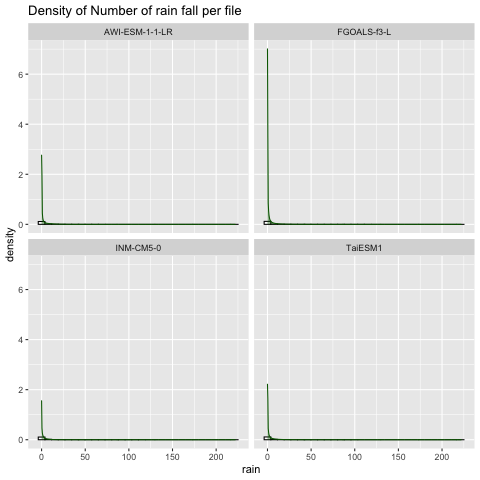

CPU times: user 23.1 s, sys: 4.25 s, total: 27.4 s
Wall time: 29.7 s


In [21]:
%%time
%%R

library(dplyr)
library(arrow)
library(ggplot2)

data <- open_dataset("data/combined_data.parquet") |>
    select("rain (mm/day)", "file") |>
    rename("rain" = "rain (mm/day)") |>
    collect()

# set seed and reduce dataset size for ggplot
set.seed(8675309)
data <- data |> sample_frac(0.5)

data$file <- as.factor(data$file)

# set seed and select 4 random file names for comparison
set.seed(8675309)
file_list <- sample(unique(data$file), 4)

data <- data |>
    filter(file %in% file_list)


    
# Histogram with kernel density
ggplot(data, aes(x = rain)) + 
ggtitle('Density of Number of rain fall per file') +
   geom_histogram(aes(y = ..density..),
                  colour = 1, fill = "white") +
    geom_density(colour = 'darkgreen',
                 fill = 'darkgreen',
                 alpha = 0.4) +
    facet_wrap(~file)

## 5.2- Count plot of number of rows per file

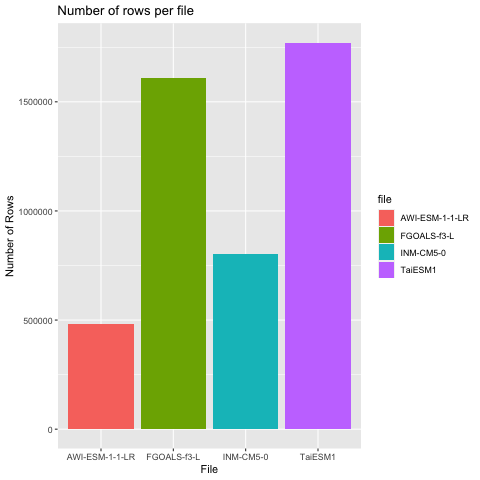

CPU times: user 2.77 s, sys: 734 ms, total: 3.51 s
Wall time: 3.64 s


In [22]:
%%time 
%%R

## count of records

ggplot(data, aes(x = file, fill=file)) +
    geom_bar(stat = 'count') + 
labs(
title = 'Number of rows per file',
x = 'File',
y = 'Number of Rows')

### Results:

| Team Member          | Operating System | RAM (GB) | Processor                 | Is SSD | Time taken |
| -------------------- | ---------------- | -------- | ------------------------- | ------ | ---------- |
|  Reza                | MacOS BigSur     | 8        | 3.1 GHz Intel Core i5     | Yes    |  2.47s |
| Taiwo Owoseni        | MacOS Catalina   | 8        |1.1GHz 4-core Intel Core i5  | Yes  | 4.74s    |
| Allyson Stoll         | MacOS BigSur     | 16    | 2.8GHz Intel Core i7         | Yes   | 3.51s      |
| Ramiro Mejia          | Windows 10 x64   | 8     |  Intel Core i5-9300H 2.40 GHz             | No    |5s      |

# Final Discussion

- Reading and processing large amount of data is very challenging, and there are only a few strategies for speeding up the process. 
- Running with a 8GB of RAM can be a computationally expensive task for the computer. File partitioning and parquet files offer a great advantage over regular methods.
- Based on the comparing results,  having greater RAM and stronger hardware would definitely improve the speed of the process.